### Imports

In [36]:
# !pip3 install ipywidgets
# !pip3 install matplotlib

In [3]:
from ipywidgets import interact
import matplotlib.pyplot as plt
import random as rnd
import math
import time

# Machine Learning

### Bronnen

**Fast.ai**

+ [Practical Deep Learning for Coders](https://course.fast.ai/)
+ [Neural net foundations](https://course.fast.ai/Lessons/lesson3.html)

**CodingTrain**:

+ [Linear Regression with Gradient Descent](https://www.youtube.com/watch?v=L-Lsfu4ab74)
+ [Mathematics of Gradient Descent](https://www.youtube.com/watch?v=jc2IthslyzM)

### Huisprijs model

+ **prijs (y)** wordt bepaald door **prijs per vierkante meter (w)** en **vaste grondprijs (b)**
+ y = w*x + b

### Data

In [4]:
m2 = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990]

In [5]:
prices = [384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063]
prices_int = []
for price in prices:
    prices_int.append(int(price))

### Handmatig matchen
Uitdaging: wie matcht het best?

In [6]:
#------------------------------------------

def manualFit(w, b):
    
    fit = [w * x + b for x in m2]
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')
    
    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')
    
    plt.show()

#------------------------------------------

interact(manualFit, w=(-2,2,0.01), b=(-1000,1000))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0, step=0.01), IntSlider(value=0…

<function __main__.manualFit(w, b)>

### Met indicator

In [7]:
# TODO: implement

#------------------------------------------

def mse(fit):
    sqr_error = 0
    for y_hat, y in zip(fit, prices):
        sqr_error += (y_hat - y)**2
    return sqr_error / len(fit)  

#------------------------------------------

def manualFit(w, b):
    
    fit = [w * x + b for x in m2]
    
    fig, ax = plt.subplots()

    ax.set(xlim=[0, 1100], ylim=[0, 1100], xlabel='Oppervlakte in m2', ylabel='Prijs in duizend euro', title='Huisprijs')
    
    plt.scatter(m2, prices)
    plt.plot(m2, fit, 'red')
    
    plt.show()
    
    # Our indicator
    print(mse(fit))

#------------------------------------------

interact(manualFit, w=(-2,2,0.01), b=(-1000,1000))

#------------------------------------------

interactive(children=(FloatSlider(value=0.0, description='w', max=2.0, min=-2.0, step=0.01), IntSlider(value=0…

<function __main__.manualFit(w, b)>

### Gradient descent

epoch:  0
delta w and b: -577.1310544240933, 4.0859591188742685
new w and b: -0.9422868945575906, -1.0004085959118874
mse:  2461.6867370703467
epoch:  1
delta w and b: -573.2562894680383, 4.088627611330379
new w and b: -0.8849612656107868, -1.0008174586730203
mse:  2428.9331035143828
epoch:  2
delta w and b: -569.40753924169, 4.091272167765072
new w and b: -0.8280205116866178, -1.0012265858897968
mse:  2396.61777424619
epoch:  3
delta w and b: -565.5846290850898, 4.093892950086111
new w and b: -0.7714620487781089, -1.0016359751848054
mse:  2364.7348835827956
epoch:  4
delta w and b: -561.7873855109243, 4.096490119113935
new w and b: -0.7152833102270164, -1.0020456241967168
mse:  2333.2786443398845
epoch:  5
delta w and b: -558.0156361966399, 4.099063834589031
new w and b: -0.6594817466073524, -1.0024555305801757
mse:  2302.243346781276
epoch:  6
delta w and b: -554.2692099766628, 4.101614255179178
new w and b: -0.604054825609686, -1.0028656920056935
mse:  2271.6233575824544
epoch:  7
d

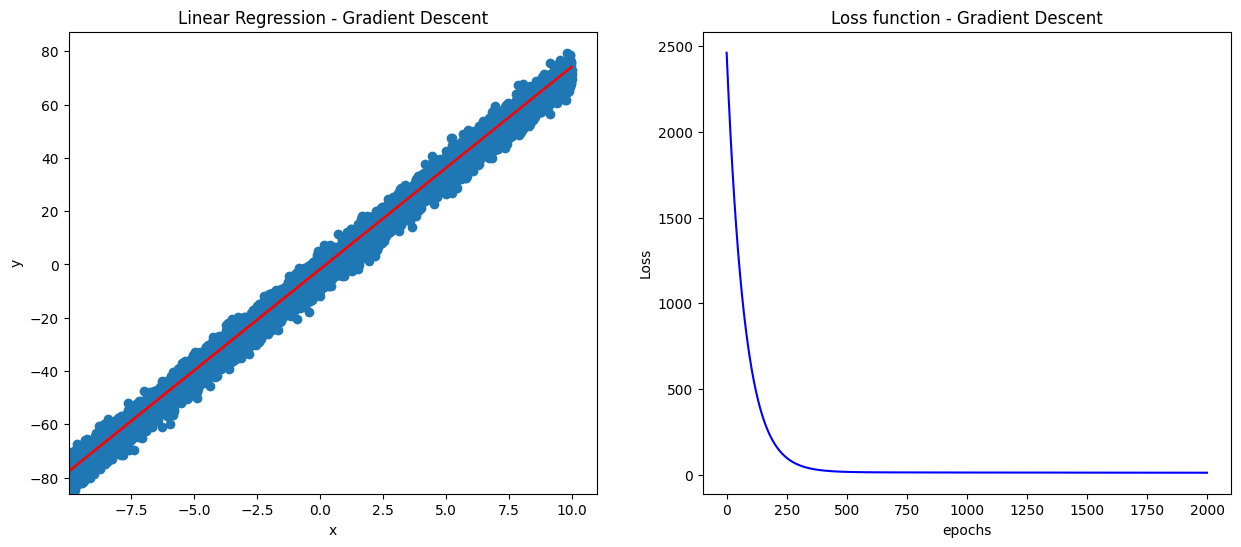

In [76]:
# NEW DATA
import numpy as np
#------------------------------------------

# Learning iterations
epochs = 2000
# Learning rate
learningRate = 1e-4

n = 10000 # 10000 datum points
m2 = np.random.uniform(-10,10, n) 
noise = np.random.normal(0, 3, n) # Gaussian distribution
true_w, true_b = 7.6, -3.3

prices = true_w * m2 + true_b + noise

#------------------------------------------

# Initial values ("guess")
wFit = -1.0
bFit = -1.0

# Epochs counter
epoch = 0

#------------------------------------------

def cost(w, b):
    sse = 0
    for area, y in zip(m2, prices):
        y_hat = w * area + b
        
        # error
        err = y - y_hat
        sse += err**2
        
    return sse / len(m2) 

#------------------------------------------

def gradientDescent(w, b):
    dw = 0
    db = 0
    for area, y in zip(m2, prices):
        dw += (y-(w*float(area)+b))*float(area)
        db += y-(w*float(area)+b)
    dw = (-2 * dw) / len(m2)
    db = (-2 * db) / len(m2)
    print(f"delta w and b: {dw}, {db}")
    new_w = w - learningRate*dw
    new_b = b - learningRate*db
    print(f"new w and b: {new_w}, {new_b}")
    return new_w, new_b

#------------------------------------------

def plotFit():
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.set(xlim=[min(m2), max(m2)*1.1], ylim=[min(prices), max(prices)*1.1], xlabel='x', ylabel='y', title='Linear Regression - Gradient Descent')
    ax2.set(xlabel='epochs', ylabel='Loss', title='Loss function - Gradient Descent')
    fit = [wFit * x + bFit for x in m2]

    ax1.scatter(m2, prices)
    ax1.plot(m2, fit, 'red')
    ax2.plot(range(epochs), mse_list, 'blue')

    plt.show()

#------------------------------------------

mse_list = []

while epoch < epochs:
    
    print("epoch: ", epoch)
    
    wFit, bFit = gradientDescent(wFit, bFit)
    mse = cost(wFit, bFit)
    mse_list.append(mse)
    print("mse: ", mse)
    
    epoch += 1


plotFit()
#------------------------------------------

epoch:  0
mse:  14131.769391688906
epoch:  1
mse:  8500.684926230304
epoch:  2
mse:  8164.783874312118
epoch:  3
mse:  7899.368026262795
epoch:  4
mse:  7650.1697394312305
epoch:  5
mse:  7415.718616170692
epoch:  6
mse:  7195.137041697935
epoch:  7
mse:  6987.60447780791
epoch:  8
mse:  6792.348979744712
epoch:  9
mse:  6608.64426945554
epoch:  10
mse:  6435.807033540579
epoch:  11
mse:  6273.194381574831
epoch:  12
mse:  6120.201454794031
epoch:  13
mse:  5976.259176244352
epoch:  14
mse:  5840.832134027167
epoch:  15
mse:  5713.416589765347
epoch:  16
mse:  5593.538604883269
epoch:  17
mse:  5480.752277731072
epoch:  18
mse:  5374.6380849959
epoch:  19
mse:  5274.801321230706
epoch:  20
mse:  5180.870630696377
epoch:  21
mse:  5092.4966260561005
epoch:  22
mse:  5009.350588784019
epoch:  23
mse:  4931.123246454221
epoch:  24
mse:  4857.523622361989
epoch:  25
mse:  4788.277953198375
epoch:  26
mse:  4723.128670752212
epoch:  27
mse:  4661.833443851867
epoch:  28
mse:  4604.164276983

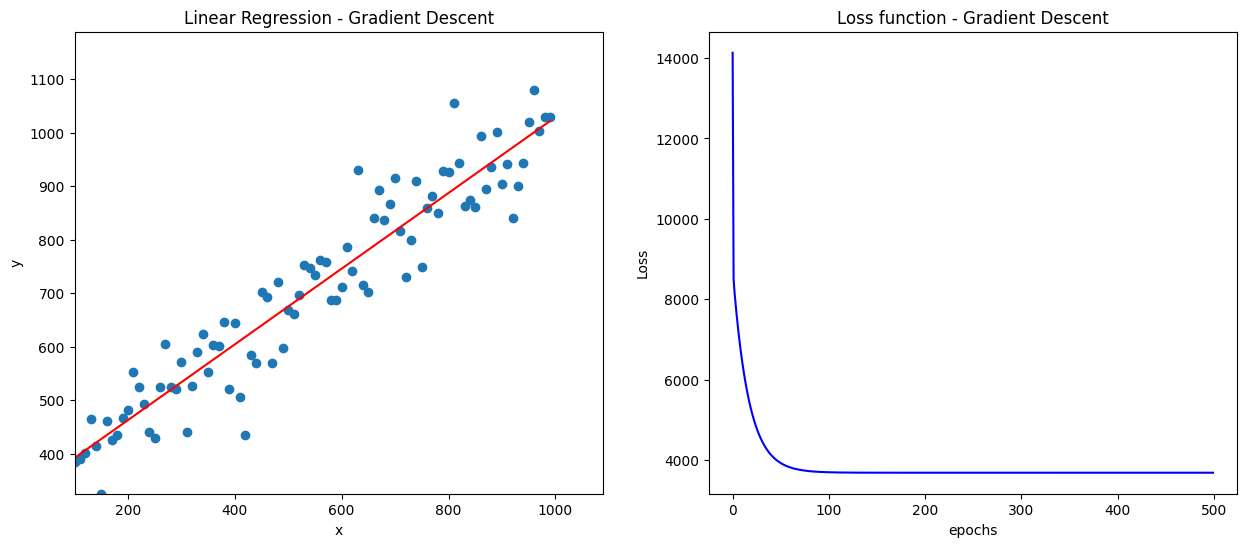

In [48]:
# Original data
# TODO: implement
import numpy as np
#------------------------------------------

# Learning iterations
epochs = 500
# Learning rate
learningRate = 1e-6

# Creating the data
m2 = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])
prices = np.array([384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063])


#------------------------------------------

# Initial values ("guess")
wFit = 0.0
bFit = 0.0

# Epochs counter
epoch = 0

# lists to track training
costs = []
wFits = []
bFits = []

#------------------------------------------

def cost(w, b):
    sse = 0
    for area, y in zip(m2, prices):
        y_hat = w * area + b
        
        # error
        err = y - y_hat
        sse += err**2
        
    return sse / len(m2) 

#------------------------------------------

def gradientDescent(w, b):
    dw = 0
    db = 0
    for area, y in zip(m2, prices):
        dw += (y-(w*float(area)+b))*float(area)
        db += y-(w*float(area)+b)
    dw = (-2 * dw) / len(m2)
    db = (-2 * db) / len(m2)
    new_w = w - learningRate*dw
    new_b = b - learningRate*db * 1e5 # A bit of cheating here (else converges too slow)
     # Keep track for gradient descent plot
    costs.append(cost(w, b))
    wFits.append(w)
    bFits.append(b)
    return new_w, new_b

#------------------------------------------

def plotFit():
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    ax1.set(xlim=[min(m2), max(m2)*1.1], ylim=[min(prices), max(prices)*1.1], xlabel='x', ylabel='y', title='Linear Regression - Gradient Descent')
    ax2.set(xlabel='epochs', ylabel='Loss', title='Loss function - Gradient Descent')
    fit = [wFit * x + bFit for x in m2]

    ax1.scatter(m2, prices)
    ax1.plot(m2, fit, 'red')
    ax2.plot(range(epochs), mse_list, 'blue')

    plt.show()

#------------------------------------------

mse_list = []

while epoch < epochs:
    
    print("epoch: ", epoch)
    
    wFit, bFit = gradientDescent(wFit, bFit)
    mse = cost(wFit, bFit)
    mse_list.append(mse)
    print("mse: ", mse)
    
    epoch += 1


plotFit()
#------------------------------------------

(1000, 1000) (1000, 1000)
(1000, 1000)


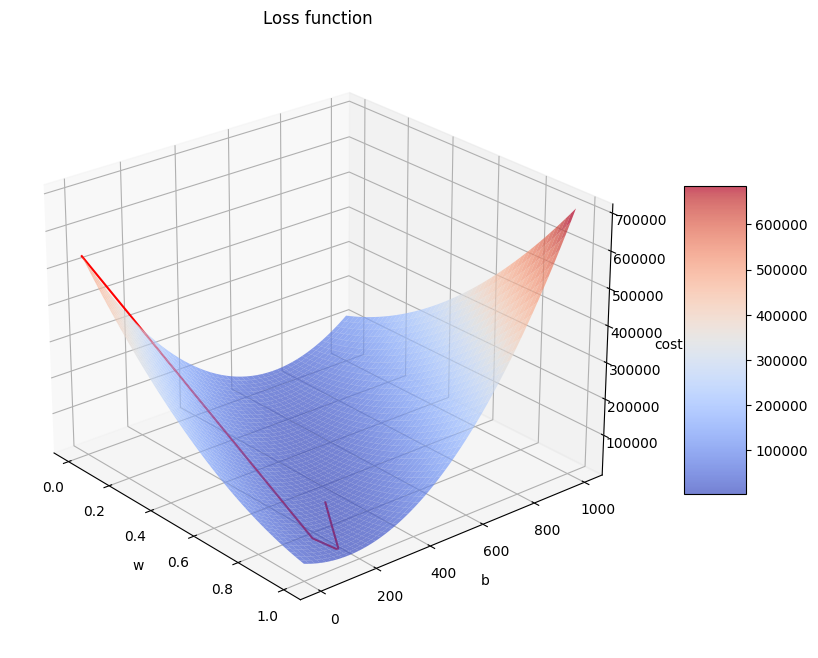

In [79]:
import numpy as np
from matplotlib import cm

# cost function to calculate cost
def cost(w, b):
    sse = 0
    for area, y in zip(m2, prices):
        y_hat = w * area + b
        
        # error
        err = y - y_hat
        sse += err**2
        
    return sse / len(m2) 

# function to plot cost function
def plotCostFunction(W, B, C):
    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 8))


    ax.set(xlabel='w', ylabel='b', zlabel='cost', title='Loss function')
    # Plot the surface.
    surf = ax.plot_surface(W, B, C, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True, alpha=0.7)
    # https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html
    ax.view_init(elev=25, azim=-40, roll=0)
    ax.plot(wFits, bFits, costs, 'red', linewidth=1.5)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()


# create list of weights and biases (making sure they have the same shape)
W = np.arange(0, 1, 0.001)
B = np.arange(0, 1000, 1)

# create a list in list of all w and b combinations
wb_combis = []
for b in B:
    w_for_b_list = []
    for w in W:
        w_for_b_list.append([w, b])
    wb_combis.append(w_for_b_list)

# Creating the data
m2 = np.array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990])
prices = np.array([384.91367692954503, 389.8967479767937, 401.20788969026364, 465.1388607569204, 414.0688201351979, 325.18526099613297, 460.2622840847401, 425.28637650519823, 435.81289210983635, 466.1119350690599, 481.26084158347044, 553.44910806194, 524.9645554759068, 493.73550242106825, 441.31748783586255, 428.9736342758598, 524.2439536647842, 605.7756579042834, 523.9159804732369, 520.5573694360451, 572.2243354280608, 440.25182913939256, 527.1405877998808, 590.3253772815467, 624.1383069765612, 553.1559229141405, 603.3619901081537, 601.374941452989, 645.7628766092549, 520.074445002628, 644.777548130977, 505.9835725792402, 435.60382044468037, 583.5176490260349, 568.8932967557804, 701.3208570139484, 693.4986129729026, 568.6647681093013, 720.31529963436, 597.8458023030355, 668.9629307564601, 661.4270155430428, 697.0093900222645, 753.3045418080637, 747.688965355471, 734.4919571308446, 762.4963668464409, 757.4944426355083, 687.111017434628, 687.7840234328396, 712.102220810479, 786.9528480333747, 741.4919100301831, 929.5027955736383, 715.6495220469454, 703.0787780068489, 840.7931460828787, 893.5294986940426, 836.3984883587482, 866.5072142177371, 914.8441484209513, 815.4180766788587, 729.3928746802716, 798.7546416176901, 909.7027030121603, 748.9425115745198, 859.3471924551083, 881.7266151539443, 848.9085484630431, 928.6542390457668, 925.6545819068597, 1054.4985961830512, 942.3977437441195, 863.3417578949857, 873.6741685366178, 861.7893229130596, 993.6591491871075, 894.321701563041, 936.0817458409582, 1000.4511833502772, 904.3575906544015, 941.4439425467597, 840.1099614077259, 900.2264966672901, 943.2584511465706, 1019.103269196167, 1080.5445290710309, 1002.7073230785402, 1029.2954995439861, 1029.7578557983063])

# Create meshgrid to use in 3d projection
W, B = np.meshgrid(W, B)
# Check shape: should be (1000,1000)
print(W.shape, B.shape)

# list to save cost calculation for all w, b combinations
cost_list = []

# getting all cost values by looping over wb_combis list
for row in wb_combis:
    # temporary row list to save all cost values for the row in question
    row_list = []
    # calculate cost for all wb combinations in the row and appending to temp row_list
    for i, (w, b) in enumerate(row):
        row_list.append(cost(w, b))
    # append this row list to cost list for use in 3d projection
    cost_list.append(row_list)

# create numpy array of cost list to use in 3d projection
cost_array = np.array(cost_list)
# check shape, should be (1000, 1000)
print(cost_array.shape)

plotCostFunction(W, B, cost_array)

### Exploreren

- Wat gebeurt er als je het aantal epochs klein kiest?
- Wat gebeurt er als je de learn rate te klein kiest?
- Wat gebeurt er als je de learn rate te groot kiest?